# GridSearch

In this lab we will try to find the visualise the effect of increasing
depth in a decision tree, and then try to create the best possible decision tree.


In [21]:
# Do the usual tasks to load the Titanic data
import pandas
titanic = pandas.read_csv('../../data/titanic.csv', index_col='PassengerId')
titanic['Gender'] = [0 if x == 'male' else 1 for x in titanic.Sex]
feature_cols = ['Pclass', 'Parch', 'Age', 'Gender']
good_data = titanic[titanic.Age.notnull()]
X = good_data[feature_cols]
y = good_data.Survived

In [22]:
# Import the sklearn libraries for grid_search and tree
import sklearn.grid_search
import sklearn.tree

In [23]:
# Create a decision tree classifier
decisiontree_classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini')

In [24]:
# Initially, we will just explore the effect of increasing
# the max_depth parameter.
# Create a dictionary which has a key of 'max_depth' and
# a value of the numbers between 1 and 20
params = {'max_depth': range(1,21),
          }

In [25]:
# Create a GridSearchCV object. It will need two parameters:
# - the decision tree classifier (from two cells back)
# - the parameters dictionary (from the previous cell)
# There is an optional "cv" parameter which you might want
# to explore later.
Brute_Force = sklearn.grid_search.GridSearchCV(decisiontree_classifier, params)

In [26]:
# Use the GridSearchCV to fit the X and y data
Brute_Force.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
# What does the best_params_ attribute say?
Brute_Force.best_params_

{'max_depth': 2}

In [28]:
# What about the best_score_ attribute?
Brute_Force.best_score_

0.79411764705882348

In [29]:
# We can see how this compares with other values.
# The grid_scores_ attribute of the GridSearchCV object
# is now a list. Print it out

Brute_Force.grid_scores_
#type(Brute_Force.grid_scores_)

[mean: 0.78011, std: 0.01121, params: {'max_depth': 1},
 mean: 0.79412, std: 0.01436, params: {'max_depth': 2},
 mean: 0.77171, std: 0.02918, params: {'max_depth': 3},
 mean: 0.77451, std: 0.03218, params: {'max_depth': 4},
 mean: 0.78011, std: 0.02381, params: {'max_depth': 5},
 mean: 0.79132, std: 0.01000, params: {'max_depth': 6},
 mean: 0.78431, std: 0.00976, params: {'max_depth': 7},
 mean: 0.78852, std: 0.01316, params: {'max_depth': 8},
 mean: 0.78291, std: 0.01690, params: {'max_depth': 9},
 mean: 0.79132, std: 0.02337, params: {'max_depth': 10},
 mean: 0.78291, std: 0.02209, params: {'max_depth': 11},
 mean: 0.78151, std: 0.02015, params: {'max_depth': 12},
 mean: 0.78571, std: 0.01426, params: {'max_depth': 13},
 mean: 0.78711, std: 0.01229, params: {'max_depth': 14},
 mean: 0.78852, std: 0.01034, params: {'max_depth': 15},
 mean: 0.79132, std: 0.00927, params: {'max_depth': 16},
 mean: 0.78992, std: 0.01124, params: {'max_depth': 17},
 mean: 0.79272, std: 0.00730, params: {'

In [30]:
# Each element of this list is a 3-tuple. The middle element
# is the score. You can use
#  [x[1] for result in YOUR_GRID_VARIABLE.grid_scores_]
# to display it

Brute_Force.grid_scores_[0]
grid_mean_scores = [result[1] for result in Brute_Force.grid_scores_]
grid_mean_scores

[0.78011204481792717,
 0.79411764705882348,
 0.77170868347338939,
 0.77450980392156865,
 0.78011204481792717,
 0.79131652661064422,
 0.78431372549019607,
 0.78851540616246496,
 0.78291316526610644,
 0.79131652661064422,
 0.78291316526610644,
 0.78151260504201681,
 0.7857142857142857,
 0.78711484593837533,
 0.78851540616246496,
 0.79131652661064422,
 0.78991596638655459,
 0.79271708683473385,
 0.79271708683473385,
 0.79131652661064422]

In [31]:
# Import matplotlib.pyplot; remember to do %matplotlib inline first
%matplotlib inline
import matplotlib.pyplot
Brute_Force.best_params_['max_depth']
Brute_Force.best_score_

0.79411764705882348

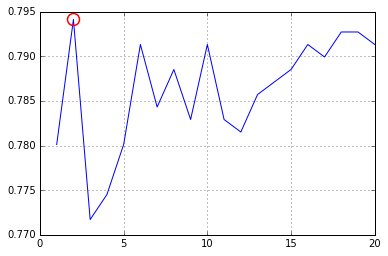

In [32]:
# Use matplotlib.pyplot.plot to plot these grid_scores_
# Once you have that working, use pyplot.plot to also add
# a marker on the best_score (pass 'ro' as the third argument
# to get a red circle on it)

depth_range = range(1, 21)
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(depth_range, grid_mean_scores)
matplotlib.pyplot.hold(True)
matplotlib.pyplot.grid(True)
matplotlib.pyplot.plot(Brute_Force.best_params_['max_depth'], Brute_Force.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

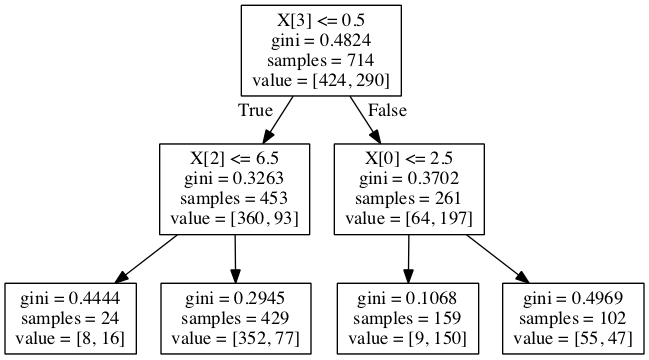

In [33]:
# If you have Graphviz and pydot installed and working,
# display the resulting decision tree




best_decisiontree_classifier = sklearn.tree.DecisionTreeClassifier(max_depth=Brute_Force.best_params_['max_depth'],
                                                                   criterion='gini'
                                                                  )
best_decisiontree_classifier.fit(X, y)

import StringIO
import sklearn.tree
import IPython.display
import pydot

File_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(best_decisiontree_classifier, out_file=File_obj)
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

## Brute-force every option (optional)

In [34]:
# Create a new GridSearchCV object and a new parameters
# dictionary. This time, try all combinations of parameters
# max_features (from 1 to 4 inclusive), max_depth (from 1 to 20)
# criterion ('gini' or 'entropy').
# What is the best decision tree you can make?

new_params = {'max_depth': range(1,21),
          'criterion': ['gini', 'entropy'],
          'max_features': [1,4]
         }
Brute_Force_two = sklearn.grid_search.GridSearchCV(decisiontree_classifier, new_params)
Brute_Force_two.fit(X, y)
Brute_Force_two.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 1}